In [1]:
import time
Master_Start = time.time()
import csv
from array import array
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms
import multiprocessing
import math
import sys
from functools import partial
import itertools
#Atom Masses
n = 14.003074
o = 15.994915
h = 1.007825
p = 1.007276
car = 12.000000

In [26]:
import multiprocessing
multiprocessing.cpu_count()

64

In [30]:
AminoAcids

,MSs
AAs,
A,71.037114
R,156.101111
N,114.042928
D,115.026944
C,103.009185
E,129.042594
Q,128.058578
G,57.021464
H,137.058912


In [32]:
pd.read_csv(os.path.join(base,'LooCode/Results','AminoAcids.csv'),index_col=0)

,MSs
AAs,
A,71.037114
R,156.101111
N,114.042928
D,115.026944
C,103.009185
E,129.042594
Q,128.058578
G,57.021464
H,137.058912


In [3]:
#Import Amino Acid Sequence
base = '/home/zach/PythonRepos/PyScripts/Other'
with open(os.path.join(base,'LooCode/Sequence (1).txt'),"r") as Seq:
    Sequence = Seq.read() #test
AminoAcids = pd.read_csv(os.path.join(base,'AminoAcids.csv'),header=None,index_col=0,usecols=[0,1],names=['AAs','MSs'])
seq_AAs = []
seq_MSs = []
for aa in Sequence:
    seq_AAs.append(aa)
    seq_MSs.append(AminoAcids.loc[aa][0])
seq_df = pd.DataFrame()
seq_df['AAs'] = seq_AAs
seq_df['MSs'] = seq_MSs
Total_Mass_Two = np.sum(seq_df['MSs']) + o + 2 * h
print("[M+H]+ = ", Total_Mass_Two + p)

[M+H]+ =  23569.327084


In [4]:
def generate_column(frag_type):
    frag_list = []
    seq_list = []
    total_length = len(seq_df.index)
    if frag_type =='N':
        for length in seq_df.index:
            frag_list.append(np.sum(seq_df['MSs'].loc[0:length]))
            seq_list.append(''.join(i for i in seq_df['AAs'].loc[0:length]))
    elif frag_type =='C':
        for length in seq_df.index:
            frag_list.append(np.sum(seq_df['MSs'].loc[total_length-length:]))
            seq_list.append(''.join(i for i in seq_df['AAs'].loc[total_length-length:]))
        frag_list.reverse()
        seq_list.reverse()
    elif 'I' in frag_type:
        length = int(frag_type.split('_')[1])
        for start_site in seq_df.index:
            if start_site==0:
                frag_list.append(np.nan) #Same as N term
                seq_list.append(np.nan)
            elif start_site==total_length:
                frag_list.append(np.nan) #Same as C term
                seq_list.append(np.nan)
            elif start_site+length>=total_length:
                frag_list.append(np.nan) #Doesnt Exist
                seq_list.append(np.nan)
            else:
                frag_list.append(np.sum(seq_df['MSs'].loc[start_site:start_site+length]))
                seq_list.append(''.join(i for i in seq_df['AAs'].loc[start_site:start_site+length]))
    return frag_type,frag_list,seq_list


In [5]:
def Lookup_Wrapper(Sequence,ncpu=4):
    Frag_Result = seq_df.copy()
    Seq_Result = seq_df.copy()
    Input = ['N','C']
    for length in seq_df.index:
        Input.append('I_'+str(length))
    with multiprocessing.Pool(ncpu) as p:
        sys.stdout.flush()
        for frag_type,frag_list,seq_list in p.imap(generate_column,Input, chunksize=1):
            Frag_Result[frag_type] = frag_list
            Seq_Result[frag_type] = seq_list
        p.close()
        sys.stdout.flush()
    return Frag_Result,Seq_Result

In [6]:
start = time.time()
global seq_df,AminoAcids    
Frag_Result,Seq_Result = Lookup_Wrapper(Sequence,ncpu=8)
print(time.time()-start)
Seq_Result.to_csv(os.path.join(base,'Seq_Result.csv'))
Frag_Result.to_csv(os.path.join(base,'Frag_Result.csv'))
Seq_Result

1.4818310737609863


,AAs,MSs,N,C,I_0,I_1,I_2,I_3,I_4,I_5,...,I_199,I_200,I_201,I_202,I_203,I_204,I_205,I_206,I_207,I_208
0,R,156.101111,R,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E,129.042594,RE,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,E,EL,ELE,ELEE,ELEEL,ELEELN,...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,ELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQD...,NaN
2,L,113.084064,REL,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,L,LE,LEE,LEEL,LEELN,LEELNV,...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,LEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDK...,NaN,NaN
3,E,129.042594,RELE,ELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIH...,E,EE,EEL,EELN,EELNV,EELNVP,...,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,EELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKI...,NaN,NaN,NaN
4,E,129.042594,RELEE,LNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHP...,E,EL,ELN,ELNV,ELNVP,ELNVPG,...,ELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIH...,ELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIH...,ELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIH...,ELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIH...,ELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIH...,ELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIH...,NaN,NaN,NaN,NaN
5,L,113.084064,RELEEL,NVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPF...,L,LN,LNV,LNVP,LNVPG,LNVPGE,...,LNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHP...,LNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHP...,LNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHP...,LNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHP...,LNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHP...,NaN,NaN,NaN,NaN,NaN
6,N,114.042928,RELEELN,VPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFA...,N,NV,NVP,NVPG,NVPGE,NVPGEI,...,NVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPF...,NVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPF...,NVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPF...,NVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPF...,NaN,NaN,NaN,NaN,NaN,NaN
7,V,99.068414,RELEELNV,PGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFAQ...,V,VP,VPG,VPGE,VPGEI,VPGEIV,...,VPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFA...,VPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFA...,VPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,P,97.052764,RELEELNVP,GEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFAQT...,P,PG,PGE,PGEI,PGEIV,PGEIVE,...,PGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFAQ...,PGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFAQ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,G,57.021464,RELEELNVPG,EIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFAQTQ...,G,GE,GEI,GEIV,GEIVE,GEIVES,...,GEIVESLSSSEESITRINKKIEKFQSEEQQQTEDELQDKIHPFAQT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
N_Frag_Mod = {}
N_Frag_Mod[''] = 0
N_Frag_Mod['a'] = - car - o
N_Frag_Mod['ap'] = N_Frag_Mod['a']+p
N_Frag_Mod['b'] = 0
N_Frag_Mod['bp'] = N_Frag_Mod['b']+p
N_Frag_Mod['c'] = n + h + h + h
N_Frag_Mod['cp'] = N_Frag_Mod['c']+p
C_Frag_Mod = {}
C_Frag_Mod[''] = 0
C_Frag_Mod['x'] = o + car + o
C_Frag_Mod['xp'] = C_Frag_Mod['x']+p
C_Frag_Mod['y'] = o + h
C_Frag_Mod['yp'] = C_Frag_Mod['y']+p+h
C_Frag_Mod['z'] = o + h - n - h
C_Frag_Mod['zp'] = C_Frag_Mod['z']+p+h

In [8]:
Fragments = pd.read_excel(os.path.join(base,"LooCode/Peaks.xlsx"),header=None)
Fragments.columns = ['Fragment']
Fragments

,Fragment
0,23969.201640
1,23990.187400
2,24010.209610
3,898.549699
4,742.446855
5,23924.195690
6,441.305492
7,1094.669055
8,1151.692247
9,23950.196850


In [9]:
# Fragments = pd.read_csv(os.path.join(base,"Fragments.csv"),header=None)
# Fragments.columns = ['Fragment']
# Fragments

In [10]:
Modifications = pd.read_csv(os.path.join(base,"Modifications.csv"),header=None)
Modifications

,0,1
0,0,None


In [11]:
def match_peaks(Fragment,shift,mod,frag_array,seq_array):
    Fragment -= shift
    diff_array = np.abs(np.subtract(Fragment,frag_array))
    Error = np.nanmin(diff_array)
    x,y = np.where(diff_array==Error)
    seqs = [i+'_'+mod for i in seq_array[x,y]]
    return Error,seqs,x,y

In [12]:
def seq_mod1_mod2_to_peak(result,N_Frag_Mod,C_Frag_Mod):
    seq,mod1,mod2 = result.split('_')
    peak = []
    for aa in seq:
        peak.append(AminoAcids.loc[aa])
    peak.append(N_Frag_Mod[mod1])
    peak.append(C_Frag_Mod[mod2])
    return np.sum(peak)

In [13]:
def calc_end_length(start_sites,Assignment):
    end_sites = []
    length = []
    for i,ss in enumerate(start_sites):
        l = len(Assignment[i].split('_')[0])
        length.append(l)
        end_sites.append(ss+l)
    return end_sites,length

In [14]:
def find_best_match(Fragment):
    Errors = []
    Seqs = []
    X = []
    Y = []
    for mod1,shift1 in N_Frag_Mod.items():
        for mod2,shift2 in C_Frag_Mod.items():
            mod = mod1+'_'+mod2
            shift = shift1+shift2
            Error,seqs,x,y = match_peaks(Fragment,shift,mod,frag_array,seq_array)
            X.append(x)
            Y.append(y)
            Errors.append(Error)
            Seqs.append(seqs)
    min_Error = np.min(Errors)
    Assignment = Seqs[np.where(Errors==min_Error)[0][0]]
    calc_peaks = seq_mod1_mod2_to_peak(Assignment[0],N_Frag_Mod,C_Frag_Mod)[0]
    start_sites = X[np.where(Errors==min_Error)[0][0]]
    end_sites,length = calc_end_length(start_sites,Assignment)
    return Fragment,min_Error,Assignment,calc_peaks,start_sites,end_sites,length

In [15]:
def match_wrapper(Fragments,seq_df,Sequence_df,ncpu=4):
    Fragment_list = []
    min_Errors = []
    Assignments = []
    Calculated = []
    Start_sites = []
    End_sites = []
    Length = []
    N_Type = []
    C_Type = []
    frag_array = np.array(seq_df.drop(columns='AAs'))
    seq_array = np.array(Sequence_df.drop(columns='MSs'))
    Input = Fragments['Fragment']
    with multiprocessing.Pool(ncpu) as p:
        sys.stdout.flush()
        for Fragment,min_Error,Assignment,calc_peaks,start_sites,end_sites,length in p.imap(find_best_match,Input, chunksize=1):
            Fragment_list.append(Fragment)
            min_Errors.append(min_Error)
            Assignments.append(Assignment)
            Calculated.append(calc_peaks)
            Start_sites.append(start_sites)
            End_sites.append(end_sites)
            Length.append(length)
            N_Type.append([i.split('_')[1] for i in Assignment])
            C_Type.append([i.split('_')[2] for i in Assignment])
        p.close()
        sys.stdout.flush()
    Results = pd.DataFrame()
    Results['Fragment'] = Fragment_list
    Results['Error'] = min_Errors
    Results['Assignment'] = Assignments
    Results['Calculated'] = Calculated
    Results['Start_site'] = Start_sites
    Results['End_site'] = End_sites
    Results['Length'] = Length
    Results['N_Type'] = N_Type
    Results['C_Type'] = C_Type
    return Results

In [16]:
frag_array = np.array(Frag_Result.drop(columns='AAs'))
seq_array = np.array(Seq_Result.drop(columns='MSs'))
global N_Frag_Mod,C_Frag_Mod,frag_array,seq_array
start = time.time()
Results = match_wrapper(Fragments,Frag_Result,Seq_Result,ncpu=8)
Results.to_csv(os.path.join(base,'Results.csv'))
print(time.time()-start)
Results

2.381404399871826


,Fragment,Error,Assignment,Calculated,Start_site,End_site,Length,N_Type,C_Type
0,23969.201640,355.861466,[RELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDEL...,23613.340174,[208],[417],[209],[cp],[xp]
1,23990.187400,376.847226,[RELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDEL...,23613.340174,[208],[417],[209],[cp],[xp]
2,24010.209610,396.869436,[RELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDEL...,23613.340174,[208],[417],[209],[cp],[xp]
3,898.549699,0.001201,"[RGPFPIIV__yp, RGPFPIIV__yp]",898.550900,"[200, 201]","[208, 209]","[8, 8]","[, ]","[yp, yp]"
4,742.446855,0.000539,[INKKIE__y],742.446316,[25],[31],[6],[],[y]
5,23924.195690,310.855516,[RELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDEL...,23613.340174,[208],[417],[209],[cp],[xp]
6,441.305492,0.001655,"[PIIV__yp, PIIV__yp]",441.307147,"[204, 205]","[208, 209]","[4, 4]","[, ]","[yp, yp]"
7,1094.669055,0.003023,"[PVRGPFPIIV__yp, PVRGPFPIIV__yp]",1094.672078,"[198, 199]","[208, 209]","[10, 10]","[, ]","[yp, yp]"
8,1151.692247,0.000835,"[VLSLSQSKVLP__, LSLSQSKVLPV__]",1151.691412,"[161, 162]","[172, 173]","[11, 11]","[, ]","[, ]"
9,23950.196850,336.856676,[RELEELNVPGEIVESLSSSEESITRINKKIEKFQSEEQQQTEDEL...,23613.340174,[208],[417],[209],[cp],[xp]


In [17]:
def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='bottom')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')

In [18]:
def view_coverage(Results,Sequence,Colors = ['purple','blue','red'],figsize=[6,6],font_size=18,step=25,shift=1):
    Frag_df = pd.DataFrame()
    Frag_df['Start_Frag_sites'] = list(itertools.chain.from_iterable(Results['Start_site']))
    Frag_df['End_Frag_sites'] = list(itertools.chain.from_iterable(Results['End_site']))
    Total_frag_loc = np.unique(Frag_df)
    print(len(Total_frag_loc),' Total Fragments')
    Terminal_frag_loc = np.unique(Frag_df[(Frag_df['Start_Frag_sites']==1) | (Frag_df['End_Frag_sites']==len(Sequence))])
    print(len(Terminal_frag_loc),' Terminal Fragments')
    Internal_frag_loc = np.unique(Frag_df[(Frag_df['Start_Frag_sites']!=1) & (Frag_df['End_Frag_sites']!=len(Sequence))])
    print(len(Internal_frag_loc),' Internal Fragments')
    Shared_frag_loc = np.unique([i for i in Terminal_frag_loc if i in Internal_frag_loc])
    print(len(Shared_frag_loc),' Shared Fragments')
    plt.figure(figsize=figsize)
    length = len(Sequence)+len(Total_frag_loc)
    step = step
    lines = math.ceil(len(Sequence)/step)
    temp_words = []
    temp_colors = []
    shift = shift
    line = 0
    size = font_size
    for i,aa in enumerate(Sequence):
        temp_words.append(aa)
        temp_colors.append('black')
        if i==len(Sequence)-shift:
            continue
        if len(Colors)==1:
            if i+shift in Total_frag_loc:
                temp_words.append('|')
                temp_colors.append(str(Colors[0]))
            else:
                temp_words.append('|')
                temp_colors.append('white')
        elif len(Colors)==2:
            if i+shift in Shared_frag_loc:
                temp_words.append('|')
                temp_colors.append(str(Colors[0]))
            elif i+shift in Terminal_frag_loc:
                temp_words.append('|')
                temp_colors.append(str(Colors[1]))
            elif i+shift in Internal_frag_loc:
                temp_words.append('|')
                temp_colors.append(str(Colors[0]))
            else:
                temp_words.append('|')
                temp_colors.append('white')
        elif len(Colors)==3:
            if i+shift in Shared_frag_loc:
                temp_words.append('|')
                temp_colors.append(str(Colors[0]))
            elif i+shift in Terminal_frag_loc:
                temp_words.append('|')
                temp_colors.append(str(Colors[1]))
            elif i+shift in Internal_frag_loc:
                temp_words.append('|')
                temp_colors.append(str(Colors[2]))
            else:
                temp_words.append('|')
                temp_colors.append('white')
        if (i+1)%step==0:
            rainbow_text(0, ((lines-line)/lines), temp_words, temp_colors, size=size)
            temp_words = []
            temp_colors = []
            line+=1
    rainbow_text(0, ((lines-line)/lines), temp_words, temp_colors, size=size)
    plt.axis('off')
    plt.show()

193  Total Fragments
63  Terminal Fragments
190  Internal Fragments
60  Shared Fragments


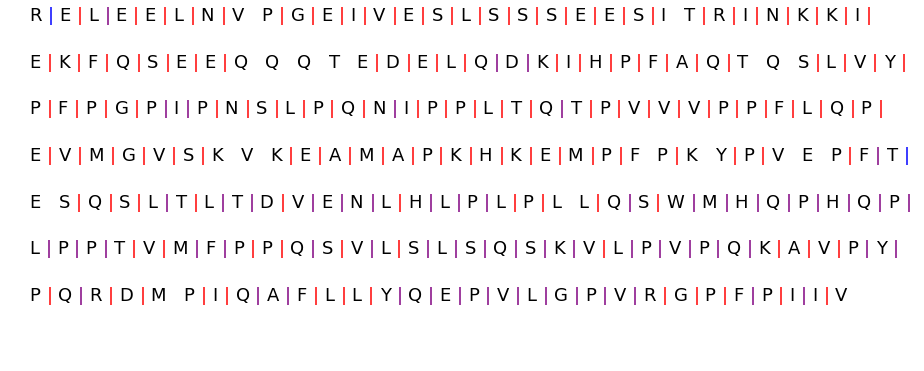

In [19]:
view_coverage(Results,Sequence,Colors = ['purple','blue','red'],step=30,shift=1)

In [20]:
print('Total Run Time: ', time.time()-Master_Start)

Total Run Time:  8.614816665649414


In [21]:
Results
Frag_df = pd.DataFrame()
Frag_df['Start_Frag_sites'] = list(itertools.chain.from_iterable(Results['Start_site']))
Frag_df['End_Frag_sites'] = list(itertools.chain.from_iterable(Results['End_site']))
Total_frag_loc_occurance = np.array(Frag_df)
Total_frag_loc = np.unique(Total_frag_loc_occurance)
print(len(Total_frag_loc),' Total Fragments')
Terminal_frag_loc_occurance = np.array(Frag_df[(Frag_df['Start_Frag_sites']==1) | (Frag_df['End_Frag_sites']==len(Sequence))])
Terminal_frag_loc = np.unique(Terminal_frag_loc_occurance)
print(len(Terminal_frag_loc),' Terminal Fragments')
Internal_frag_loc_occurance = np.array(Frag_df[(Frag_df['Start_Frag_sites']!=1) & (Frag_df['End_Frag_sites']!=len(Sequence))])
Internal_frag_loc = np.unique(Internal_frag_loc_occurance)
print(len(Internal_frag_loc),' Internal Fragments')
Shared_frag_loc_occurance = np.array([i for i in Terminal_frag_loc if i in Internal_frag_loc])
Shared_frag_loc = np.unique(Shared_frag_loc_occurance)
print(len(Shared_frag_loc),' Shared Fragments')
temp_words = []
temp_colors = []
temp_intensity = []
Colors = ['purple','blue','red']
shift = 1

for i,aa in enumerate(Sequence):
    temp_words.append(aa)
    temp_colors.append('black')
    temp_intensity.append(0)
    if i==len(Sequence)-shift:
        continue
    if len(Colors)==1:
        if i+shift in Total_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
            temp_intensity.append(len(Total_frag_loc_occurance[Total_frag_loc_occurance==i+shift]))
        else:
            temp_words.append('|')
            temp_colors.append('white')
            temp_intensity.append(0)
    elif len(Colors)==2:
        if i+shift in Shared_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
            temp_intensity.append(len(Total_frag_loc_occurance[Total_frag_loc_occurance==i+shift]))
        elif i+shift in Terminal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[1]))
            temp_intensity.append(len(Total_frag_loc_occurance[Total_frag_loc_occurance==i+shift]))
        elif i+shift in Internal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
            temp_intensity.append(len(Total_frag_loc_occurance[Total_frag_loc_occurance==i+shift]))
        else:
            temp_words.append('|')
            temp_colors.append('white')
            temp_intensity.append(0)
    elif len(Colors)==3:
        if i+shift in Shared_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[0]))
            temp_intensity.append(len(Total_frag_loc_occurance[Total_frag_loc_occurance==i+shift]))
        elif i+shift in Terminal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[1]))
            temp_intensity.append(len(Total_frag_loc_occurance[Total_frag_loc_occurance==i+shift]))
        elif i+shift in Internal_frag_loc:
            temp_words.append('|')
            temp_colors.append(str(Colors[2]))
            temp_intensity.append(len(Total_frag_loc_occurance[Total_frag_loc_occurance==i+shift]))
        else:
            temp_words.append('|')
            temp_colors.append('white')
            temp_intensity.append(0)
annotated = ''.join(i for i in temp_words)
annotated

193  Total Fragments
63  Terminal Fragments
190  Internal Fragments
60  Shared Fragments


'R|E|L|E|E|L|N|V|P|G|E|I|V|E|S|L|S|S|S|E|E|S|I|T|R|I|N|K|K|I|E|K|F|Q|S|E|E|Q|Q|Q|T|E|D|E|L|Q|D|K|I|H|P|F|A|Q|T|Q|S|L|V|Y|P|F|P|G|P|I|P|N|S|L|P|Q|N|I|P|P|L|T|Q|T|P|V|V|V|P|P|F|L|Q|P|E|V|M|G|V|S|K|V|K|E|A|M|A|P|K|H|K|E|M|P|F|P|K|Y|P|V|E|P|F|T|E|S|Q|S|L|T|L|T|D|V|E|N|L|H|L|P|L|P|L|L|Q|S|W|M|H|Q|P|H|Q|P|L|P|P|T|V|M|F|P|P|Q|S|V|L|S|L|S|Q|S|K|V|L|P|V|P|Q|K|A|V|P|Y|P|Q|R|D|M|P|I|Q|A|F|L|L|Y|Q|E|P|V|L|G|P|V|R|G|P|F|P|I|I|V'

In [23]:
new_colors = []
for i in temp_colors:
    if i=='black':
        new_colors.append(0.5)
    elif i=='white':
        new_colors.append(0.5)
    elif i==Colors[0]:
        new_colors.append(0)
    elif i==Colors[1]:
        new_colors.append(0)
    elif i==Colors[2]:
        new_colors.append(1)

In [24]:
temp_df_list = []
for i in temp_words:
    if i=='|':
        temp_df_list.append('')
    else:
        temp_df_list.append(i)
# temp_df_list[temp_df_list=='|']=''
temp_intensity_list = new_colors
step = 50
while len(temp_df_list)%step!=0:
    temp_df_list.append('')
while len(temp_intensity_list)%step!=0:
    temp_intensity_list.append(0)
    
Annotations_DF = pd.DataFrame(np.reshape(np.array(temp_df_list),(int(len(temp_df_list)/step),step)))
Intensity_DF = pd.DataFrame(np.reshape(np.array(temp_intensity_list),(int(len(temp_intensity_list)/step),step)))


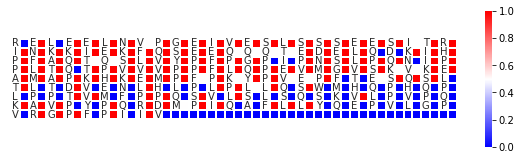

In [25]:
%matplotlib inline
import seaborn as sns
fig = plt.figure(figsize=[10,10])
fig.subplots_adjust(hspace=0.5,)
sns.heatmap(Intensity_DF,
            cmap="bwr",
            vmin=0,
            vmax=None,
            square=True,
            linewidths=1,
            linecolor='white',
            cbar=True,
            cbar_kws={'shrink':0.25},
            xticklabels=False,
            yticklabels=False,
            annot=Annotations_DF,
            fmt='',
            )
# fig.colorbar(location="right",
#              use_gridspec=False,
#              pad=0.05,
#              shrink=0.75,
#              )
# fig.colorbar()
plt.show()